In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import random
import numpy as np

In [34]:
tipos = 1
values = []

for i in range(0, tipos):
    with open("Datos entreno 2 sensores\\tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w1, x1, y1, z1, w2, x2, y2, z2, etiqueta = map(float, line.strip().split(','))
            dato = [w1, x1, y1, z1, w2, x2, y2, z2, etiqueta]
            values.append(dato)
print(len(values))

2000


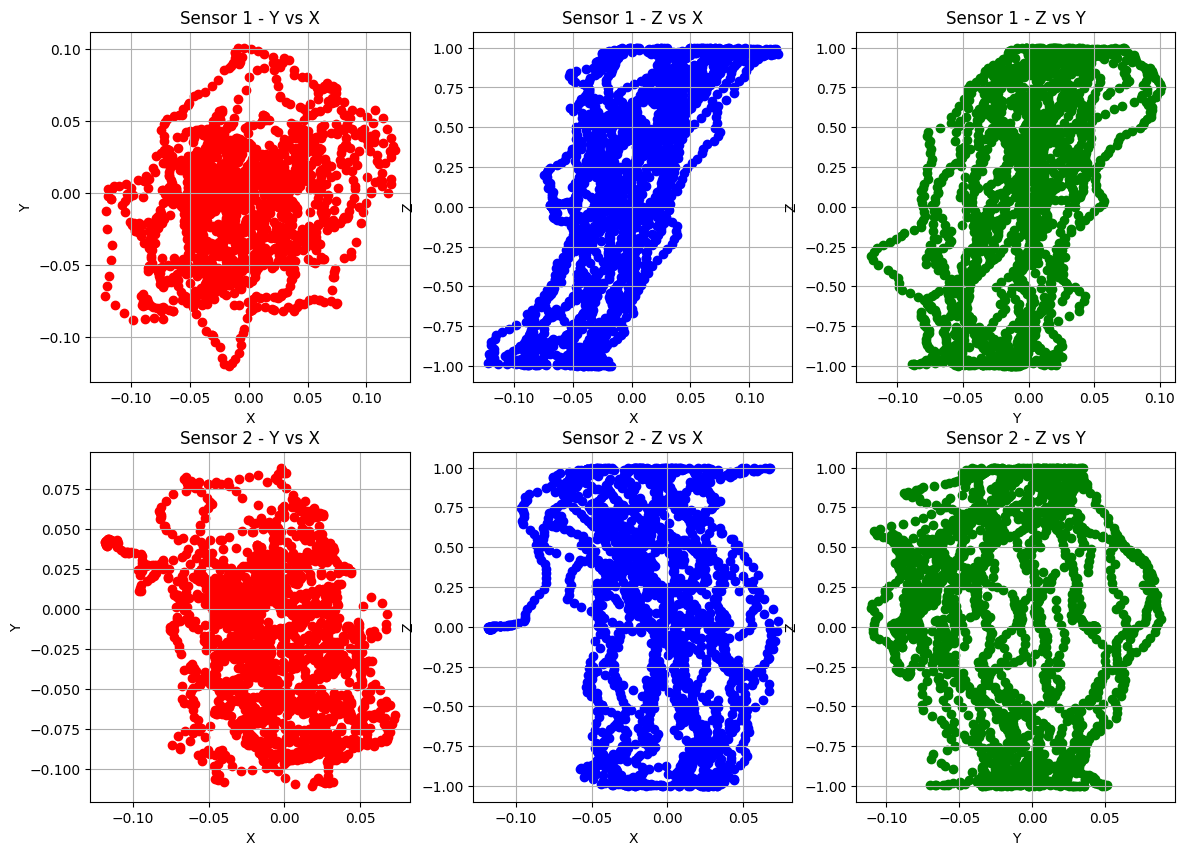

In [35]:
x1, y1, z1, x2, y2, z2 = [], [], [],[], [], []
for v in values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[5]), y2.append(v[6]), z2.append(v[7])

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1), plt.scatter(x1, y1, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Sensor 1 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 2), plt.scatter(x1, z1, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Sensor 1 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 3), plt.scatter(y1, z1, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Sensor 1 - Z vs Y'), plt.grid(True)

plt.subplot(2, 3, 4), plt.scatter(x2, y2, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Sensor 2 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 5), plt.scatter(x2, z2, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Sensor 2 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 6), plt.scatter(y2, z2, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Sensor 2 - Z vs Y'), plt.grid(True)
plt.show()

In [36]:
test_size = int(len(values) * 0.2)  # Calcula el tamaño del conjunto de prueba (20%)

# Mezcla aleatoriamente los índices de los datos de entrenamiento
indices = list(range(len(values)))
random.shuffle(indices)

test_indices = indices[:test_size]  # Selecciona los primeros test_size índices para el conjunto de prueba
train_indices = indices[test_size:] # Resto de los índices para el conjunto de entrenamiento

# Construye los conjuntos de entrenamiento y prueba
train, test = [], []
test = [values[i] for i in test_indices]
train = [values[i] for i in train_indices]

train_values, train_labels, test_values, test_labels = [], [], [], []

for valor in train:
    dato, etiqueta = valor[:8], valor[8:]
    train_values.append(dato)
    train_labels.append(etiqueta)

for valor in test:
    dato, etiqueta = valor[:8], valor[8:]
    test_values.append(dato)
    test_labels.append(etiqueta)

In [37]:
print(train_values[:1])
print(train_labels[:5])
print(train_labels[995:])
print(len(train_values))
print(len(test_values))

[[-0.81329346, 0.02227783, 0.02062988, 0.58105469, -0.79266357, 0.01507568, -0.05627441, 0.60681152]]
[[0.0], [0.0], [0.0], [0.0], [0.0]]
[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], 

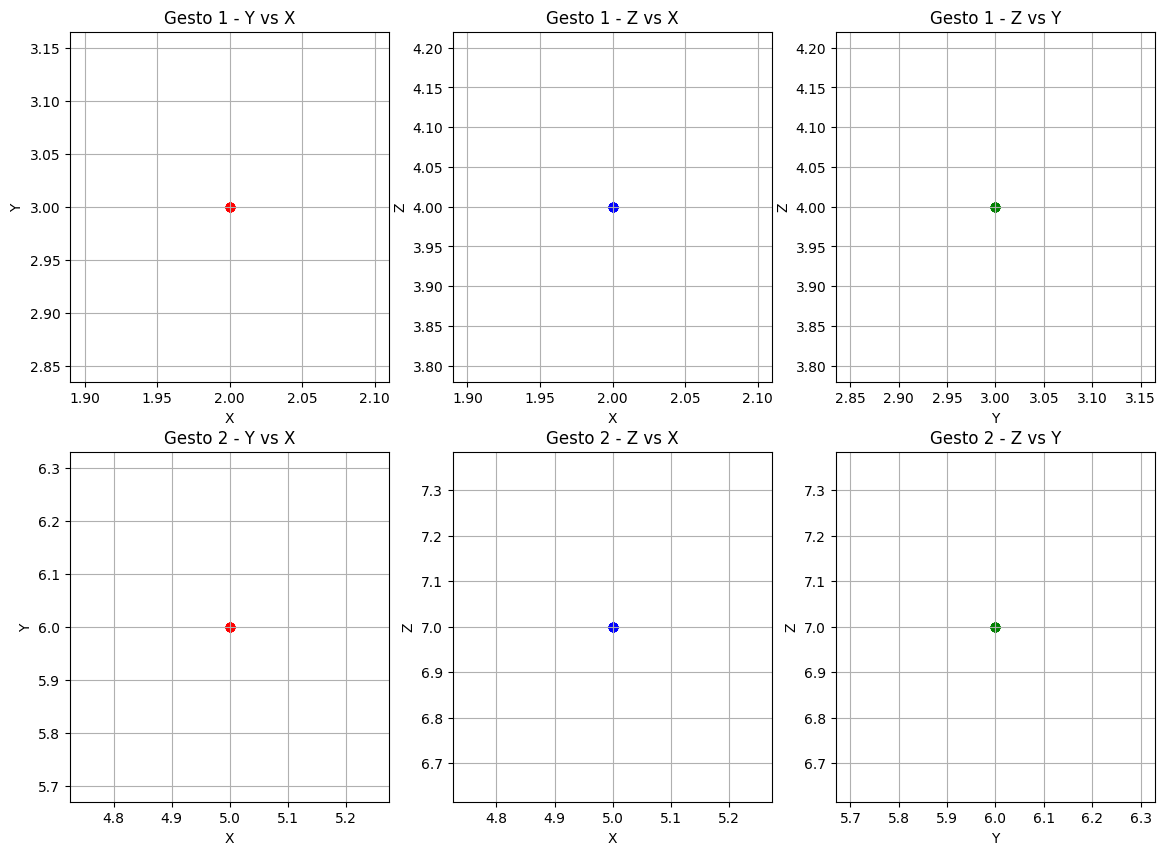

In [25]:
x1, y1, z1, x2, y2, z2 = [], [], [],[], [], []
for v in train_values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[4]), y2.append(v[5]), z2.append(v[6])

plt.figure(figsize=(14, 10))
plt.subplot(2, 3, 1), plt.scatter(x1, y1, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Gesto 1 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 2), plt.scatter(x1, z1, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Gesto 1 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 3), plt.scatter(y1, z1, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Gesto 1 - Z vs Y'), plt.grid(True)

plt.subplot(2, 3, 4), plt.scatter(x2, y2, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Gesto 2 - Y vs X'), plt.grid(True)
plt.subplot(2, 3, 5), plt.scatter(x2, z2, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Gesto 2 - Z vs X'), plt.grid(True)
plt.subplot(2, 3, 6), plt.scatter(y2, z2, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Gesto 2 - Z vs Y'), plt.grid(True)
plt.show()

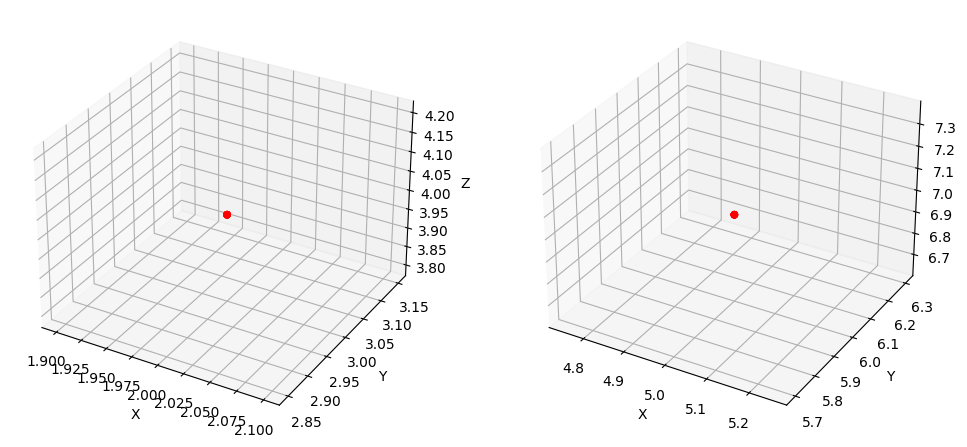

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x21620ed0b50>,
 Text(-0.040333437836905205, -0.08732445447180061, 'X'),
 Text(0.06811776674000858, -0.07075223053697641, 'Y'),
 Text(0.10436717821226962, 0.013982550559146293, 'Z'),
 None)

In [16]:
x1, y1, z1, x2, y2, z2 = [], [], [],[], [], []
for v in train_values:
    x1.append(v[1]), y1.append(v[2]), z1.append(v[3]), x2.append(v[4]), y2.append(v[5]), z2.append(v[6])

fig = plt.figure(figsize=(12, 8))
a1 = fig.add_subplot(1,2,1, projection='3d')
a1.scatter(x1, y1, z1, c='r', marker='o'), a1.set_xlabel('X'), a1.set_ylabel('Y'), a1.set_zlabel('Z')
a2 = fig.add_subplot(1,2,2, projection='3d')
a2.scatter(x2, y2, z2, c='r', marker='o'), a2.set_xlabel('X'), a2.set_ylabel('Y'), a2.set_zlabel('Z'), plt.show()

In [17]:
labels_one_hot = to_categorical(train_labels)   # Convertimos las etiquetas en one hot

# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(8,), activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=10, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

ValueError: in user code:

    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\fraja\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10) and (None, 2) are incompatible


In [322]:
labels_one_hot = to_categorical(train_labels)   # Convertimos las etiquetas en one hot

# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(8,), activation='sigmoid'),
    Dense(2, activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=10, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

100/100 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9991
Loss: 0.014262751676142216, Accuracy: 0.9990624785423279


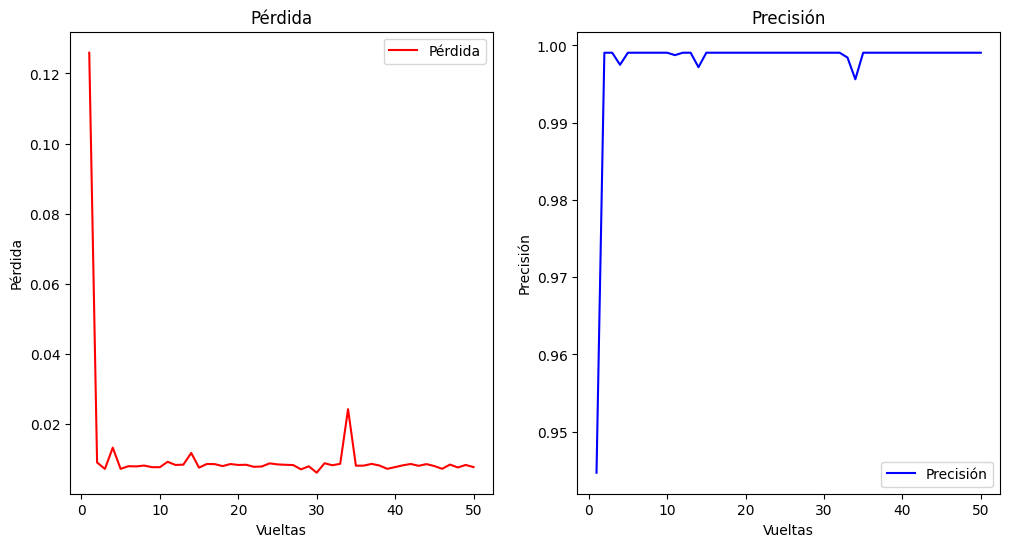

In [318]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Crear dos gráficos, uno para la pérdida y otro para la precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(epochs, loss, 'r', label='Pérdida')
plt.title('Pérdida'), plt.xlabel('Vueltas'), plt.ylabel('Pérdida'), plt.legend()

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(epochs, accuracy, 'b', label='Precisión')
plt.title('Precisión'), plt.xlabel('Vueltas'), plt.ylabel('Precisión'), plt.legend()

plt.show()

In [319]:
# Hacer predicciones en el conjunto de datos de prueba
predictions = model.predict(test_values)

# Convertir las predicciones a clases
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Imprimir algunos ejemplos de valores reales y predichos del conjunto de prueba
print("Ejemplos del conjunto de prueba:")
# for i in range(50):  # Muestra los primeros 5 ejemplos
#     print(f"Valor Real: {test_labels[i]}, Etiqueta Predicha: {predicted_classes[i]}")


25/25 [==============================] - 0s 3ms/step
Ejemplos del conjunto de prueba:


In [320]:
# Contadores para las predicciones correctas e incorrectas
correct_predictions = 0
incorrect_predictions = 0

# Comparar las etiquetas reales con las etiquetas predichas
for i in range(len(test_labels)):
    if test_labels[i] == predicted_classes[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Imprimir el recuento de predicciones correctas e incorrectas
print(f"Predicciones Correctas: {correct_predictions}")
print(f"Predicciones Incorrectas: {incorrect_predictions}")


total_predictions = len(test_labels)
accuracy = (correct_predictions / total_predictions) * 100
error_rate = (incorrect_predictions / total_predictions) * 100


# Imprimir el porcentaje de aciertos y errores
print(f"Porcentaje de Aciertos: {accuracy:.2f}%")
print(f"Porcentaje de Errores: {error_rate:.2f}%")

Predicciones Correctas: 797
Predicciones Incorrectas: 3
Porcentaje de Aciertos: 99.62%
Porcentaje de Errores: 0.38%


In [312]:
# Ruta donde se guardará el modelo
ruta_modelo = "modelo_3_precision_99,906_porc_sigmoid_2_neuronas_intermedia.h5"

# Guardar el modelo
model.save(ruta_modelo)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.
